In [123]:
from fastai.vision import *

# View Data

In [126]:
root_data_dest = Path('data/')

In [127]:
np.random.seed(42)
data = ImageDataBunch.from_folder(root_data_dest, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4)
data = data.normalize(imagenet_stats)

In [128]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['hamburger', 'pizza', 'sandwich'], 3, 670, 167)

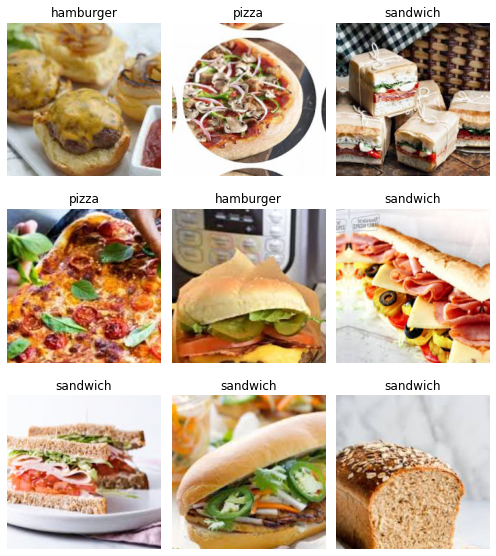

In [129]:
data.show_batch(rows=3, figsize=(7,8))

# Train data

In [142]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [143]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.475611,0.506806,0.179641,00:05
1,1.046329,0.394698,0.125749,00:05
2,0.791683,0.478674,0.119760,00:05
3,0.672029,0.492354,0.125749,00:05


In [144]:
learn.save('stage-1')

# Results

In [145]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

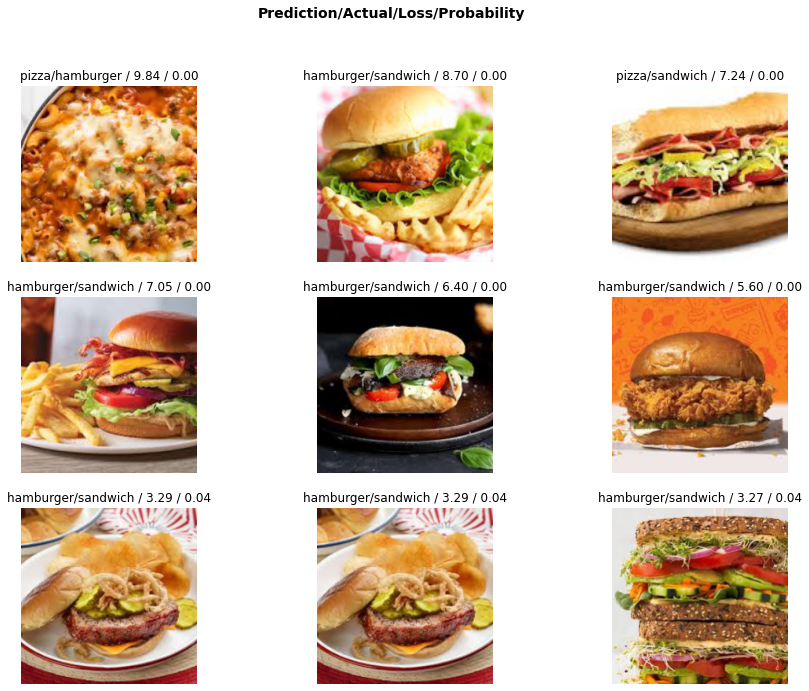

In [146]:
interp.plot_top_losses(9, figsize=(15,11))

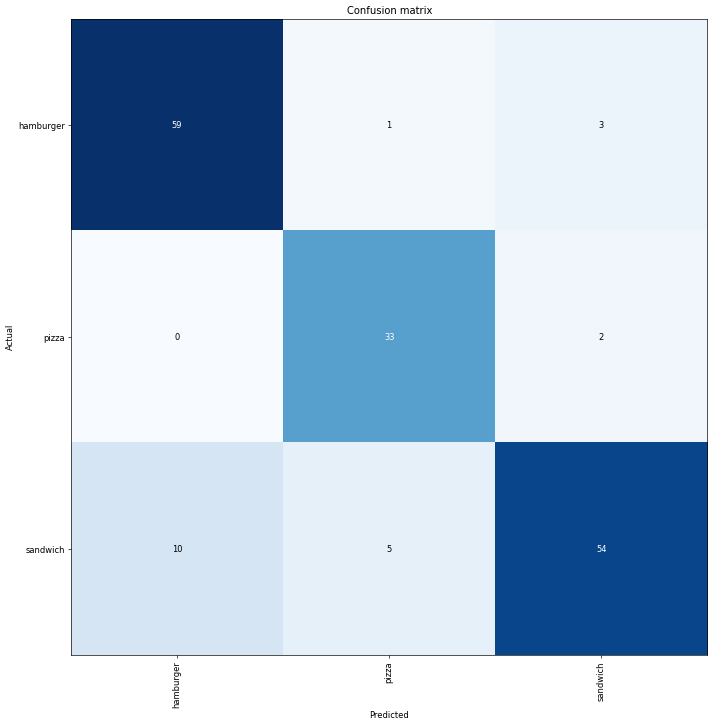

In [147]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [148]:
learn.unfreeze()

In [149]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.592564,0.907854,0.185629,00:05


In [150]:
learn.load('stage-1');

In [151]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


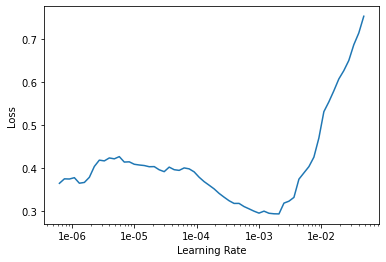

In [152]:
learn.recorder.plot()

In [156]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(10**(-6), 10**(-3)))

epoch,train_loss,valid_loss,error_rate,time
0,0.028989,0.293529,0.077844,00:05
1,0.032567,0.307151,0.077844,00:05
2,0.031378,0.293428,0.083832,00:05
3,0.035326,0.441213,0.089820,00:05
4,0.031859,0.441814,0.077844,00:05
5,0.037851,0.385889,0.089820,00:05
6,0.037670,0.355903,0.077844,00:05
7,0.034399,0.352822,0.083832,00:05
8,0.030635,0.342540,0.089820,00:05
9,0.027987,0.345071,0.083832,00:05
